# Import Python modules
First, we need to import the modules that we will need to acomplish this project

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns


# Load the Data

This project got two data files, `Observations.csv` and `Species_info.csv`. Both need to be read in as DataFrames.

Then, we print the first 5 rows of each dataframe to see what feature do each DataFrame has and the info they got.

In [3]:
species = pd.read_csv('species_info.csv')
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [32]:
observations = pd.read_csv('observations.csv')
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


Also is important to check the type of each feature on the DataFrames, we use **info()** to check data types and also to look for any null value on the DataFrame.

In [5]:
species.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


In [33]:
observations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


# Explore the Data

First, it will be important to see min, max, mean values for each value, for that we use **describe()**
For species we found out that there are 7 unique values for category, some scientific names are repited and same for common names.For conversation status, there are 4 different status with Species of Concern as the top freq one.

In [11]:
species.describe()

,category,scientific_name,common_names,conservation_status
count,5824,5824,5824,191
unique,7,5541,5504,4
top,Vascular Plant,Castor canadensis,Brachythecium Moss,Species of Concern
freq,4470,3,7,161


We look for the unique values at the conservation status column. We knowed that the column has **nan** values so we confirm it here.

In [14]:
print(species['conservation_status'].unique())

[nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


It will be important to also look for the unique values at the category column

In [15]:
print(species['category'].unique())

['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


Lets look for the number of each value on both columns, category and conservation status.

In [17]:
species.groupby('category').size()

category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
dtype: int64

At ploting the number of each values we noted that there are only 191 values so there should be 5633 nan at that columns. Let's confirm it.

In [23]:
print(species.groupby('conservation_status').size())
print(f'na number of values: {species.conservation_status.isna().sum()}')

conservation_status
Endangered             16
In Recovery             4
Species of Concern    161
Threatened             10
dtype: int64
na number of values: 5633


### Observations 

For the observations dataset, first it is important to check the number of parks at the dataset.

In [41]:
print('Number of parks:', observations['park_name'].nunique())
print('Park names:', observations['park_name'].unique())

Number of parks: 4
Park names: ['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


We look for more detailed info of the observations (mix, max, mean, etc)

In [42]:
observations.describe()

,observations
count,23296.000000
mean,142.287904
std,69.890532
min,9.000000
25%,86.000000
50%,124.000000
75%,195.000000
max,321.000000


 That was not very valuable information, since it is not known which species each number obtained is for, so we proceed to search for the total number of observations.

In [44]:
print('Numer of observations:', observations['observations'].sum())

Numer of observations: 3314739


## Analysis
For doing a correct analysis, first we need to clean the data  `conservation_status` column in  `species`.
Lets sustitute  `nan` for  `No Intervention`.



In [46]:
species.fillna('No Intervention', inplace=True)
print(species.groupby('conservation_status').size())

conservation_status
Endangered              16
In Recovery              4
No Intervention       5633
Species of Concern     161
Threatened              10
dtype: int64


It is important to understand the distribution of the category of those animals with their conservation status. We can eliminate the `No Intervention ` since it doesn't gave us important information.

In [77]:
conservationCategory = species.groupby(["conservation_status", "category"])['scientific_name'].count().unstack()
conservationCategory = conservationCategory.drop(index = 'No Intervention')
conservationCategory

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


To undestand better the distribution, a graph is made to visualize the numbers between  `conservation_status` and  `species`. Different types of graph were tried but the better one was the bar plot.

Text(0, 0.5, 'Number of species')

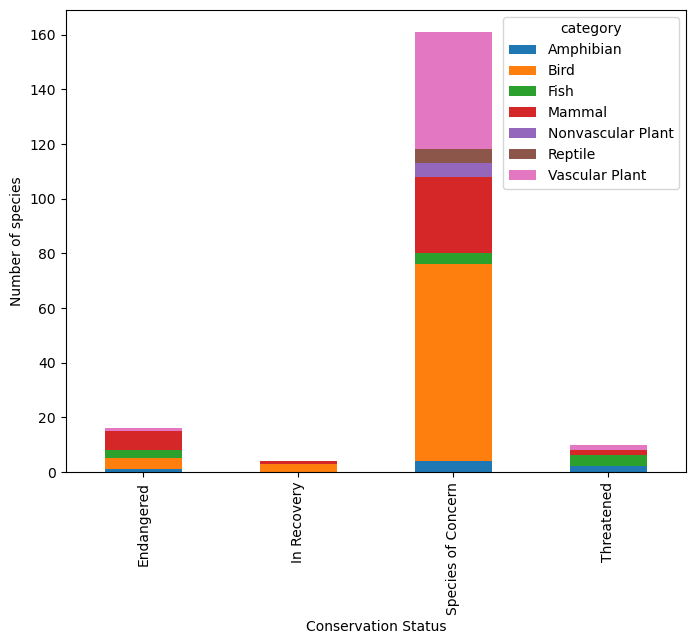

In [72]:
graph = conservationCategory.plot(kind = 'bar' , figsize=(8,6),stacked=True)
graph.set_xlabel('Conservation Status')
graph.set_ylabel('Number of species')

Let separate number of each category of animals by if they are protected or non protected. For that we create a column with True and False called `is protected`.

In [88]:
species['is_protected'] = species.conservation_status != 'No Intervention'

We separate them with a **groupby()**. And proceed to calculate percentage of each of them.

In [94]:
protected_counts = (species.groupby(['category', 'is_protected'])['scientific_name'].nunique().reset_index().pivot_table(index='category', columns='is_protected', values='scientific_name', fill_value=0).reset_index())
protected_counts.columns = ['category', 'not_protected', 'protected']
protected_counts['percentage_protected'] = protected_counts['protected']/(protected_counts['protected']+protected_counts['not_protected'])*100

protected_counts


,category,not_protected,protected,percentage_protected
0,Amphibian,72,7,8.860759
1,Bird,413,75,15.368852
2,Fish,115,11,8.730159
3,Mammal,146,30,17.045455
4,Nonvascular Plant,328,5,1.501502
5,Reptile,73,5,6.410256
6,Vascular Plant,4216,46,1.079305


The category with the most species protected are **Mammal**, **Bird** and **Vascular Plant**. We will need to look for any.

Since we have some string values on our dataset, it will be not convenient to try to make a correlation matrix. So we have another method we can use to analyse if they had relationship on each and it will be the chi-squared test.

We check the relationship between **Mammal** and **Bird** and we get a p-value of **0.6879**, since the standard p-value singnificance is **0.05**, the one we get is higher than the threshold so doesnt seem to be any significant relationship between them.

In [119]:
from scipy.stats import chi2_contingency

relation1 = [[30,146], [75,413]]
chi2_contingency(relation1)

Chi2ContingencyResult(statistic=0.1617014831654557, pvalue=0.6875948096661336, dof=1, expected_freq=array([[ 27.8313253, 148.1686747],
       [ 77.1686747, 410.8313253]]))

We tried some combinations and we found out that p-value was below the thresold for the case of **Amphibian** and **Nonvascular Plant**.

In [132]:
relation2 = [[7,72], [5,328]]
chi2_contingency(relation2)

Chi2ContingencyResult(statistic=9.765103711306242, pvalue=0.001778554820715609, dof=1, expected_freq=array([[  2.30097087,  76.69902913],
       [  9.69902913, 323.30097087]]))

In [133]:
merged_df = pd.merge(species, observations, on='scientific_name')
count_common_names = merged_df.groupby('park_name')['common_names'].nunique().reset_index()
count_common_names.columns = ['park_name', 'number_of_common_names']
count_common_names

,park_name,number_of_common_names
0,Bryce National Park,5504
1,Great Smoky Mountains National Park,5504
2,Yellowstone National Park,5504
3,Yosemite National Park,5504
